<h1>Coronavirus Analysis</h1>
Anthony Preza<br>
Last Updated: 3/14/20
<h4>Summary</h4>
<p>This notebook is meant for adhoc analysis of the spread of coronavirus (COVID-19, novel coronavirus). We begin by downloading the latest time series data from the <a href="https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases">Humanitarian Data Exchange</a>. Confirmed cases and deaths are analyzed worldwide and by country. </p>
<p>TO-DO: Analyze recovery.</p>

To reproduce this notebook, you must have numpy, pandas, matplotlib, scikit-learn, and scipy installed.
```bash
python3 -m venv .venv
source .venv/bin/activate
pip install numpy pandas matplotlib scikit-learn notebook
```
Use Kernel -> Restart Kernel And Run All Cells to run this notebook and create visualizations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Download and view data.

In [2]:
!cd data && wget -O time_series_19-covid-Confirmed.csv https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Confirmed.csv && wget -O time_series_19-covid-Deaths.csv https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Deaths.csv && wget -O time_series_19-covid-Recovered.csv https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Recovered.csv

--2020-03-15 06:26:27--  https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Confirmed.csv
Resolving data.humdata.org (data.humdata.org)... 162.249.108.156
Connecting to data.humdata.org (data.humdata.org)|162.249.108.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘time_series_19-covid-Confirmed.csv’

time_series_19-covi     [  <=>               ]  65.03K   262KB/s    in 0.2s    

2020-03-15 06:26:28 (262 KB/s) - ‘time_series_19-covid-Confirmed.csv’ saved [66594]

--2020-03-15 06:26:28--  https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Deaths.csv
Resolving data.humdata.org (data.humdata.org)... 162.249.108.156
C

In [3]:
!ls data

COVID-19			    time_series_19-covid-Deaths.csv
time_series_19-covid-Confirmed.csv  time_series_19-covid-Recovered.csv


In [4]:
import os

# create list of datasets
datasets = []
for f in os.listdir('data'):
    if '.csv' in f:
        print(f)
        dataset = pd.read_csv(f'data/{f}')
        datasets.append(dataset)

time_series_19-covid-Recovered.csv
time_series_19-covid-Confirmed.csv
time_series_19-covid-Deaths.csv


<h1>Confirmed cases</h1>

In [5]:
# describe the data
confirmed = datasets[1]
confirmed.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,...,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,32.472246,-38.240308,1.255656,1.477376,2.128959,3.244344,4.791855,6.622172,12.619910,13.950226,...,221.452489,230.280543,239.414027,248.404977,256.925339,268.307692,284.762443,290.368778,328.490950,353.171946
std,18.243160,80.488626,21.171051,21.257000,26.477289,36.865436,51.533686,69.443788,170.220759,171.323903,...,3231.736307,3245.454795,3259.270219,3272.375630,3287.815469,3300.662870,3327.040627,3334.956867,3408.758787,3472.648781
min,-41.454500,-157.858400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.517325,-94.614125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.194900,-75.247900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,42.328900,18.981425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,3.000000,4.000000,6.000000,7.000000,8.750000,11.750000,17.000000,25.750000,30.750000
max,64.963100,174.886000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,67466.000000,67592.000000,67666.000000,67707.000000,67743.000000,67760.000000,67773.000000,67781.000000,67786.000000,67790.000000


In [6]:
# view first 5 points
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


Calculating total confirmed cases worldwide and building visualizations.

In [7]:
total_confirmed = confirmed.drop(columns=['Lat', 'Long', 'Country/Region']).sum()
print(f'Total confirmed cases worldwide: {total_confirmed[-1]}')

Total confirmed cases worldwide: 156102


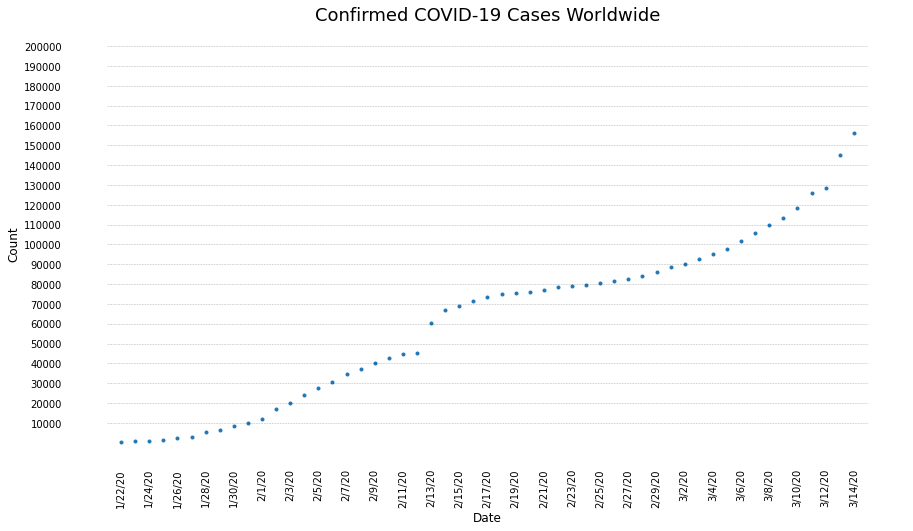

In [8]:
# create figure and axis objects, set figure size
fig, ax = plt.subplots(figsize=[15,8])

# plot the data
plt.scatter(total_confirmed.index, total_confirmed.values, label='Confirmed cases worldwide', marker='.')

# chartjunk clean up
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Date',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.yticks(range(10000, 200001, 10000))
plt.xticks(total_confirmed.index[::2],rotation=90,fontsize=10)

for y in range(10000, 200001, 10000):    
    plt.plot([-1,len(total_confirmed.index)], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  

plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  
plt.title('Confirmed COVID-19 Cases Worldwide', fontsize=18)
plt.show()

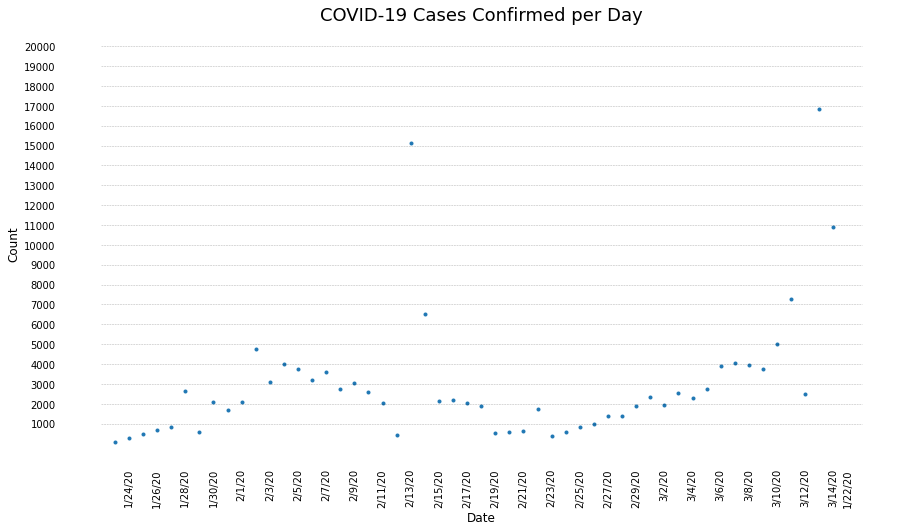

In [9]:
confirmed_per_day = np.diff(total_confirmed)

# create figure and axis objects, set figure size
fig, ax = plt.subplots(figsize=[15,8])

# plot the data
plt.scatter(total_confirmed.index[1:], confirmed_per_day, label='Cases confirmed per day', marker='.')

# chartjunk clean up
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Date',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.yticks(range(1000, 20001, 1000))
plt.xticks(total_confirmed.index[::2],rotation=90,fontsize=10)

for y in range(1000, 20001, 1000):    
    plt.plot([-1,len(total_confirmed.index)], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  

plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)
plt.title('COVID-19 Cases Confirmed per Day', fontsize=18)
plt.show()

Calculate confirmed cases grouped by country and visualize.

In [10]:
confirmed_by_country = confirmed.drop(columns=['Lat', 'Long']).groupby('Country/Region').sum().sort_values(by=confirmed.columns[-1], ascending=False)

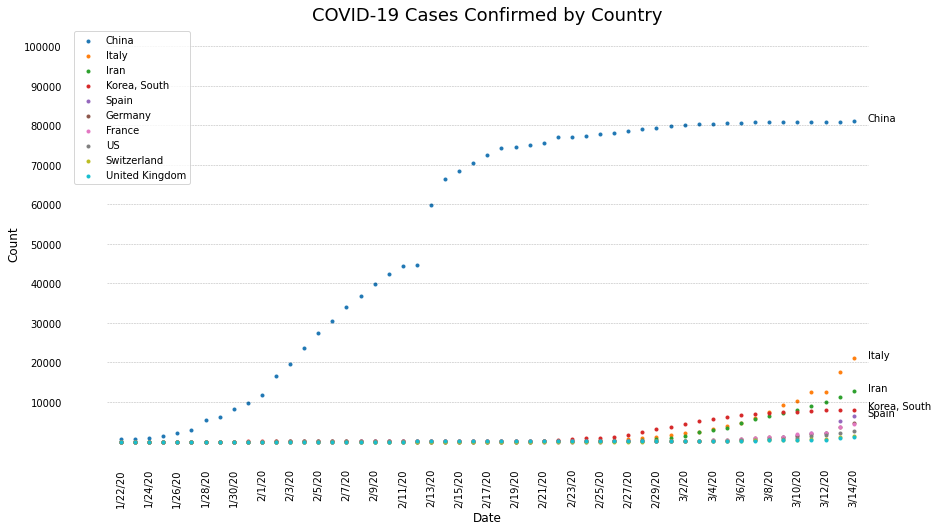

In [11]:
# create figure and axis objects, set figure size
fig, ax = plt.subplots(figsize=[15,8])

# plot the data
for country in confirmed_by_country.index[:10]:
    plt.scatter(confirmed_by_country.columns, confirmed_by_country.loc[country], label=country, marker='.')
    if country in confirmed_by_country.index[:5]:
        plt.annotate(country, (len(confirmed_by_country.columns), confirmed_by_country.loc[country, confirmed_by_country.columns[-1]]))

# chartjunk clean up
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Date',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.yticks(range(10000, 100001, 10000))
plt.xticks(total_confirmed.index[::2],rotation=90,fontsize=10)

for y in range(10000, 100001, 10000):    
    plt.plot([-1,len(total_confirmed.index)], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  

plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  

plt.legend(loc='upper left')
plt.title('COVID-19 Cases Confirmed by Country', fontsize=18)
plt.show()

Visualize localization of cases worldwide.

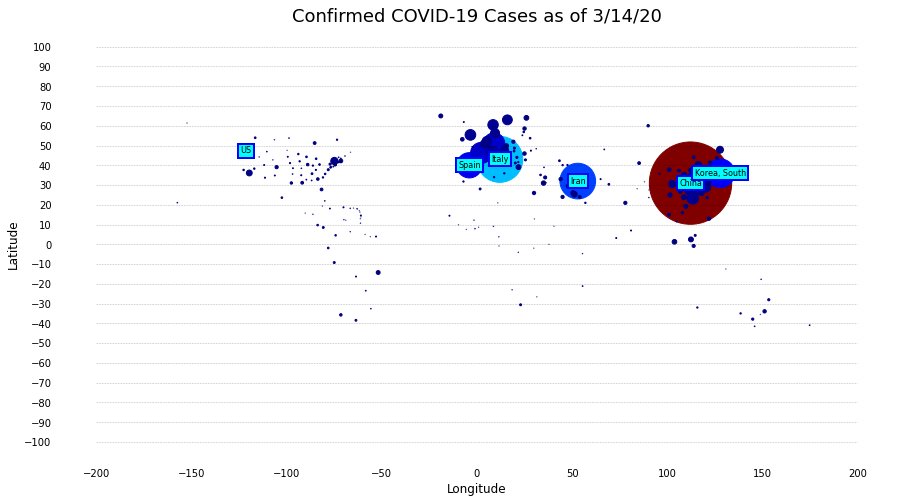

In [12]:
lat_long = confirmed.groupby(by=['Country/Region', 'Lat', 'Long'], as_index=False).sum().sort_values(by=confirmed.columns[-1], ascending=False)

# create figure and axis objects, set figure size
fig, ax = plt.subplots(figsize=[15,8])

# plot the data
plt.scatter(lat_long['Long'], lat_long['Lat'], s=lat_long[confirmed.columns[-1]]/10, c=lat_long[confirmed.columns[-1]]/100, cmap=plt.get_cmap("jet"))
for r in (*lat_long.values[:5], lat_long.loc[lat_long['Country/Region'] == 'US'].iloc[0].values):
        bbox_props = dict(boxstyle="square,pad=0.3", fc="cyan", ec="b", lw=2)
        plt.text(r[2], r[1], r[0], ha="center", va="center", rotation=0,
                    size=8,
                    bbox=bbox_props)

# chartjunk clean up
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Longitude',fontsize=12)
plt.ylabel('Latitude',fontsize=12)
plt.yticks(range(-100, 101, 10))
plt.xticks(fontsize=10)

for y in range(-100, 101, 10):    
    plt.plot([-200, 200], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  

plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  

plt.title(f'Confirmed COVID-19 Cases as of {confirmed.columns[-1]}', fontsize=18)
plt.show()

<h1>Deaths</h1>

In [13]:
deaths = datasets[2]

# describe the data
deaths.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.00000,442.000000,442.000000,...,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,32.472246,-38.240308,0.038462,0.040724,0.058824,0.095023,0.126697,0.18552,0.296380,0.300905,...,7.574661,7.828054,8.049774,8.601810,9.022624,9.642534,10.441176,10.678733,12.226244,13.165158
std,18.243160,80.488626,0.808608,0.809898,1.143324,1.903576,2.474773,3.61616,5.946125,5.946660,...,138.276384,139.816814,141.307973,143.330153,145.125872,147.491508,150.963459,151.851434,159.423717,164.161312
min,-41.454500,-157.858400,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.517325,-94.614125,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.194900,-75.247900,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.328900,18.981425,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,64.963100,174.886000,17.000000,17.000000,24.000000,40.000000,52.000000,76.00000,125.000000,125.000000,...,2902.000000,2931.000000,2959.000000,2986.000000,3008.000000,3024.000000,3046.000000,3056.000000,3062.000000,3075.000000


In [14]:
# visualize first 5 data points
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,6,6,6,10,10,15,16,19,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Calculating total deaths worldwide and visualizing.

In [15]:
total_deaths = deaths.drop(columns=['Lat', 'Long', 'Country/Region']).sum()
print(f'Total deaths worldwide: {total_deaths[-1]}')

Total deaths worldwide: 5819


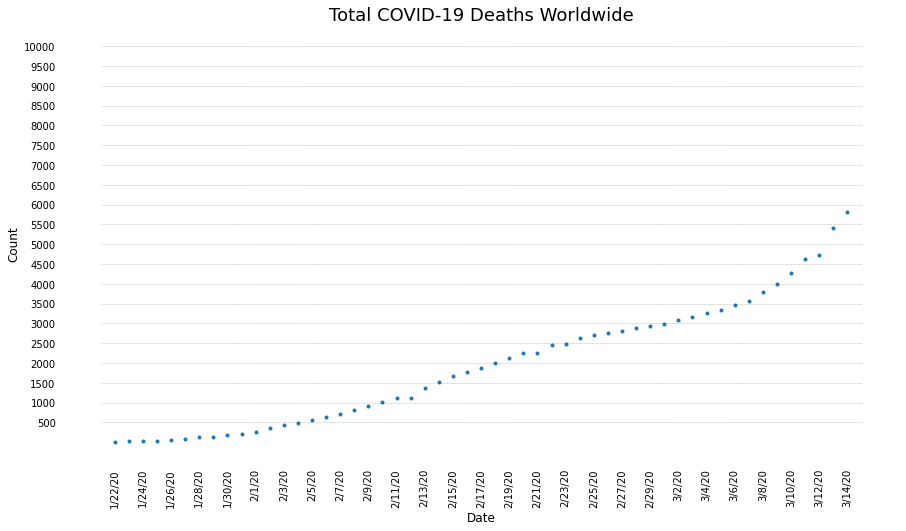

In [16]:
# create figure and axis objects, set figure size
fig, ax = plt.subplots(figsize=[15,8])

# plot the data
plt.scatter(total_deaths.index, total_deaths.values, label='Confirmed deaths worldwide', marker='.')

# chartjunk clean up
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Date',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.yticks(range(500, 10001, 500))
plt.xticks(total_deaths.index[::2],rotation=90,fontsize=10)

for y in range(500, 10001, 500):    
    plt.plot([-1,len(total_deaths.index)], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  

plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)
plt.title('Total COVID-19 Deaths Worldwide', fontsize=18)
plt.show()

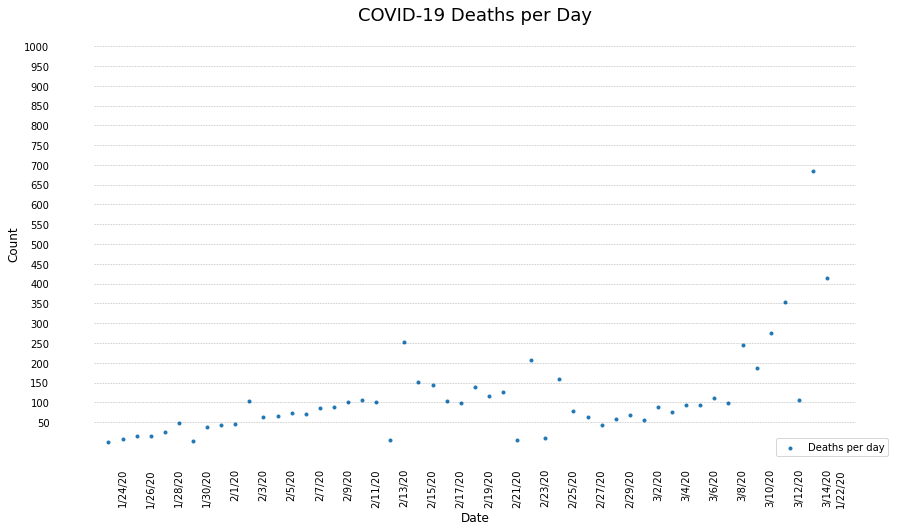

In [17]:
deaths_per_day = np.diff(total_deaths)

# create figure and axis objects, set figure size
fig, ax = plt.subplots(figsize=[15,8])

# plot the data
plt.scatter(total_deaths.index[1:], deaths_per_day, label='Deaths per day', marker='.')
plt.legend()

# chartjunk clean up
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Date',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.yticks(range(50, 1001, 50))
plt.xticks(total_deaths.index[::2],rotation=90,fontsize=10)

for y in range(50, 1001, 50):    
    plt.plot([-1,len(total_deaths.index)], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  

plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)
plt.title('COVID-19 Deaths per Day', fontsize=18)
plt.show()

In [18]:
deaths_by_country = deaths.drop(columns=['Lat', 'Long']).groupby('Country/Region').sum().sort_values(by='3/10/20', ascending=False)

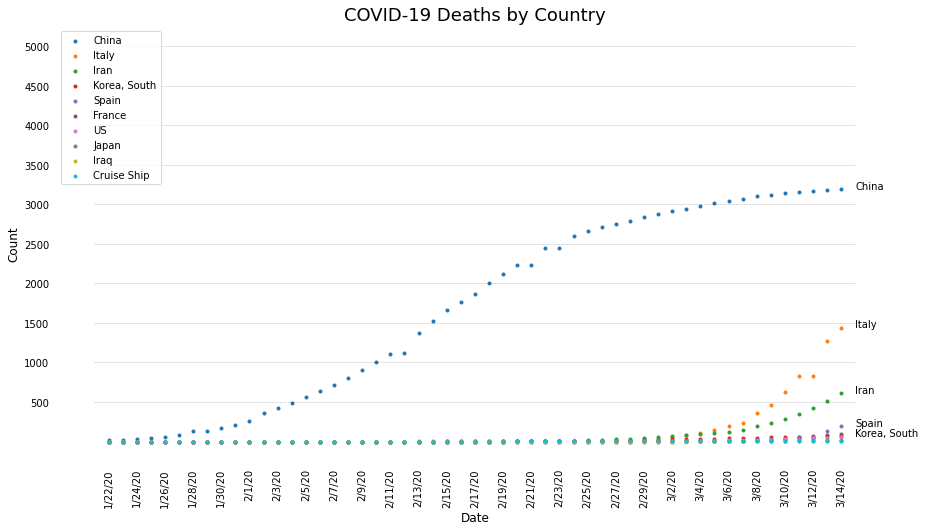

In [19]:
# create figure and axis objects, set figure size
fig, ax = plt.subplots(figsize=[15,8])

# plot the data
for country in deaths_by_country.index[:10]:
    plt.scatter(deaths_by_country.columns, deaths_by_country.loc[country], label=country, marker='.')
    if country in deaths_by_country.index[:5]:
        plt.annotate(country, (len(deaths_by_country.columns), deaths_by_country.loc[country, deaths_by_country.columns[-1]]))
plt.legend(loc='upper left')

# chartjunk clean up
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Date',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.yticks(range(500, 5001, 500))
plt.xticks(total_deaths.index[::2],rotation=90,fontsize=10)

for y in range(500, 5001, 500):    
    plt.plot([-1,len(total_deaths.index)], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  

plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  
plt.title('COVID-19 Deaths by Country', fontsize=18)
plt.show()

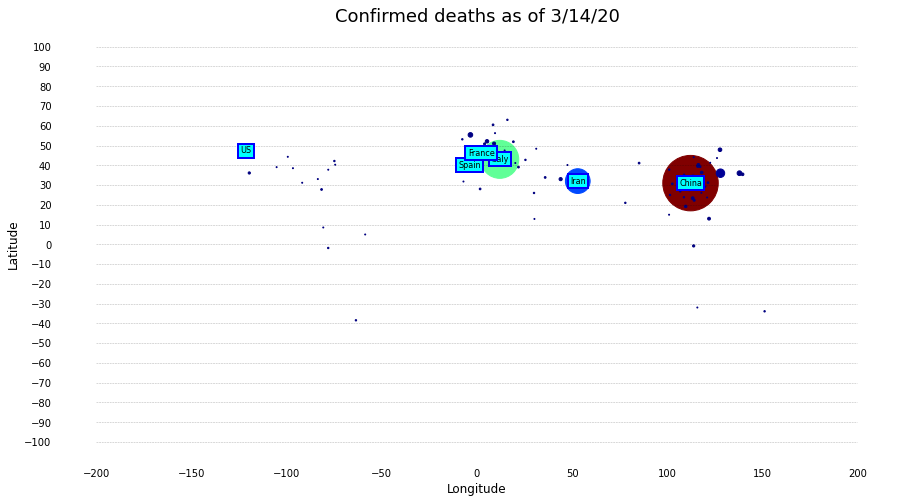

In [20]:
lat_long = deaths.groupby(by=['Country/Region', 'Lat', 'Long'], as_index=False).sum().sort_values(by=deaths_by_country.columns[-1], ascending=False)

# create figure and axis objects, set figure size
fig, ax = plt.subplots(figsize=[15,8])

# plot the data
plt.scatter(lat_long['Long'], lat_long['Lat'], s=lat_long[deaths_by_country.columns[-1]], c=lat_long[deaths_by_country.columns[-1]], cmap=plt.get_cmap("jet"))
for r in (*lat_long.values[:5], lat_long.loc[lat_long['Country/Region'] == 'US'].iloc[0].values):
        bbox_props = dict(boxstyle="square,pad=0.3", fc="cyan", ec="b", lw=2)
        plt.text(r[2], r[1], r[0], ha="center", va="center", rotation=0,
                    size=8,
                    bbox=bbox_props)

# chartjunk clean up
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Longitude',fontsize=12)
plt.ylabel('Latitude',fontsize=12)
plt.yticks(range(-100, 101, 10))
plt.xticks(fontsize=10)

for y in range(-100, 101, 10):    
    plt.plot([-200, 200], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  

plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  

plt.title(f'Confirmed deaths as of {deaths_by_country.columns[-1]}', fontsize=18)
plt.show()

Visualizing US cases and fitting data to exponential growth. Assuming exponential growth function 
<h4>x = x<sub>0</sub>e<sup>kt</sup></h4>

In [21]:
us_cases = confirmed_by_country.loc['US']
us_cases = us_cases.to_numpy().reshape(-1, 1)

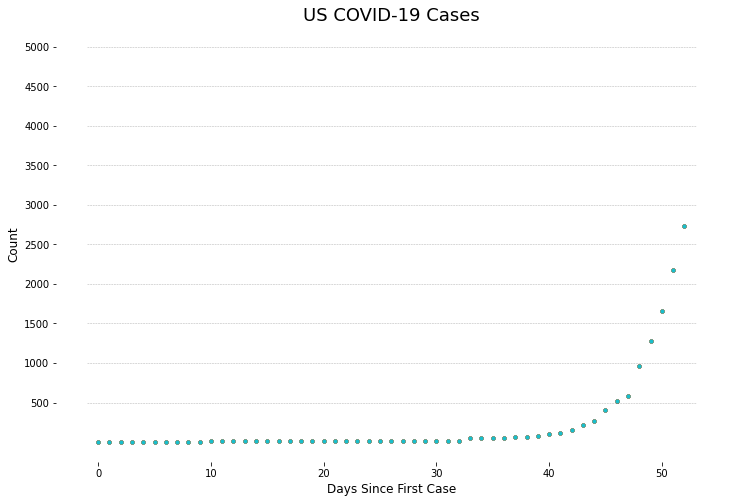

In [22]:
fig, ax = plt.subplots(figsize=(12,8))

for y in range(500, 5001, 500):    
    plt.plot([-1,len(us_cases)], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  
    plt.scatter(range(len(us_cases)), us_cases, marker='.')

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)

plt.xticks(fontsize=10)
plt.xlabel('Days Since First Case', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.yticks(range(500, 5001, 500))

plt.title('US COVID-19 Cases', fontsize=18)
plt.show()

In [23]:
X0 = us_cases[0][0]
t = np.array(range(len(us_cases)))
Xt = np.array(us_cases)
t_train, t_test, Xt_train, Xt_test = train_test_split(t, Xt)

In [24]:
from scipy.optimize import curve_fit


def fit(t, k):
    return np.exp(k*t)

fit_params, fit_cov = curve_fit(fit, t_train.ravel(), Xt_train.ravel())
k = fit_params[0]
k

0.14774140486052384

Estimated k value is ~ 0.15<br></br>
X<sub>0</sub> = 1
<h4>x = e<sup>0.15t</sup></h4>

In [25]:
fit_cov

array([[9.36276931e-07]])

In [26]:
Xt_pred = fit(t_train.ravel(), k)
np.sqrt(mean_squared_error(Xt_train, Xt_pred))

166.37873148254616

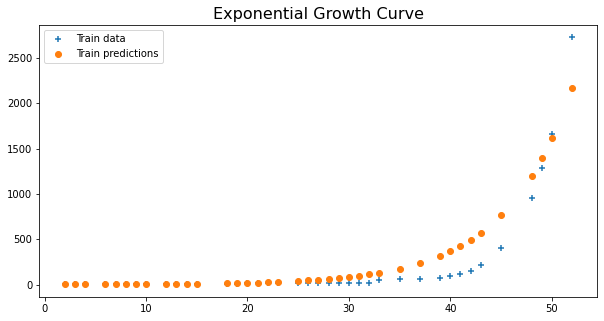

In [27]:
plt.figure(figsize=(10,5))
plt.scatter(t_train, Xt_train, label='Train data', marker='+')
plt.scatter(t_train, Xt_pred, label='Train predictions', marker ='o')
plt.legend()
plt.title('Exponential Growth Curve', fontsize=16)
plt.show()

The model is underfitting in this case. However, it looks promising. Key takeway being that without mitigation the spread could very well be exponential.

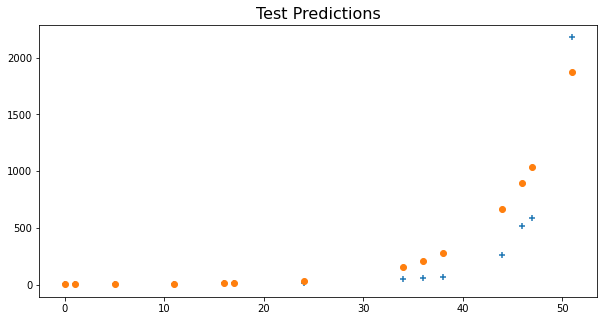

In [28]:
pred = fit(t_test.ravel(), k)
plt.figure(figsize=(10,5))
plt.scatter(t_test, Xt_test, label='Test data', marker='+')
plt.scatter(t_test, pred, label='Test predictions', marker ='o')
plt.title('Test Predictions', fontsize=16)
plt.show()

In [29]:
np.sqrt(mean_squared_error(Xt_test, pred))

220.25242313565388